# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


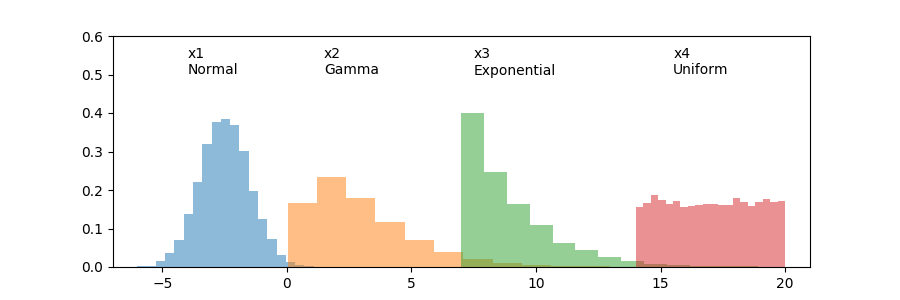

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.animation as animation

def update_hist(curr, xs, axs, n):
    if curr == n:
        ahist.event_source.stop()
        
    for i in range(4):
        axs[i].cla()
        axs[i].hist(xs[i][:curr], normed = True, bins = 20)
        axs[i].set_title('n={}'.format(curr))
    plt.tight_layout()

<IPython.core.display.Javascript object>


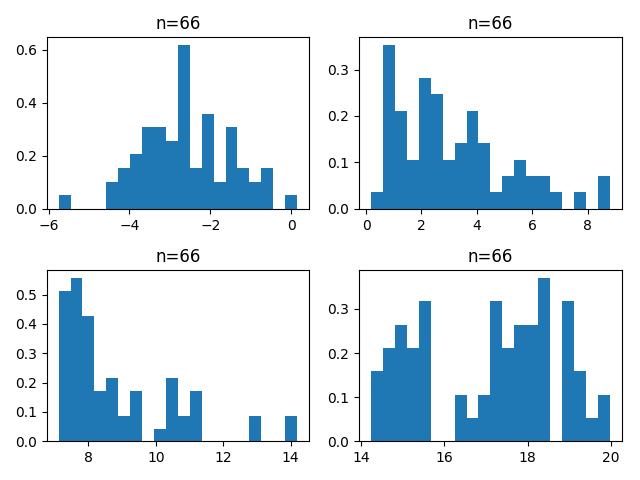

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(2, 2)

subp1 = plt.subplot(gspec[0, 0])
subp2 = plt.subplot(gspec[0, 1])
subp3 = plt.subplot(gspec[1, 0])
subp4 = plt.subplot(gspec[1, 1])
xs = [np.random.choice(x1, size = 1000), 
      np.random.choice(x2, size = 1000), 
      np.random.choice(x3, size = 1000), 
      np.random.choice(x4, size = 1000)]
#mins = [np.min(x1) - 1.0, np.min(x2) - 1.0, np.min(x3) - 1.0, np.min(x4) - 1.0]
#maxs = [np.max(x1) + 1.0, np.max(x2) + 1.0, np.max(x3) + 1.0, np.max(x4) + 1.0]
axs = [subp1, subp2, subp3, subp4]

ahist = animation.FuncAnimation(fig, update_hist, fargs=(xs, axs, 1000), interval = 20, frames=1000) #save_count=1000

In [11]:
# Set up formatting for the movie files
ahist.save('ahist.mp4')

/opt/conda/lib/python3.5/site-packages/matplotlib/animation.py:971: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)
/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
